In [75]:
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
adapt_path = "same_title_adaptations.csv"
adapt_df = pd.read_csv(adapt_path)
adapt_df = adapt_df.drop(columns=['Unnamed: 0'])

In [77]:
anime_ranked = adapt_df.sort_values(by=['Anime Rank'])
manga_ranked = adapt_df.sort_values(by=['Manga Rank'])
manga_ranked.head()

,Title,Anime Rank,Adaptation Type,Episodes,Aired,Anime Votes,Anime Score,Manga Rank,Type,Volumes,Published,Manga Votes,Manga Score
212,Berserk,7404,TV,12,Jul 2016 - Sep 2016,345813,6.30,1,Manga,?,Aug 1989 -,637448,9.47
1038,One Piece,55,TV,?,Oct 1999 -,2182691,8.69,4,Manga,?,Jul 1997 -,573384,9.22
626,Monster,25,TV,74,Apr 2004 - Sep 2005,1021020,8.87,5,Manga,18,Dec 1994 - Dec 2001,226020,9.15
485,Slam Dunk,109,TV,101,Oct 1993 - Mar 1996,284596,8.54,6,Manga,31,Sep 1990 - Jun 1996,156001,9.08
973,Vinland Saga,43,TV,24,Jul 2019 - Dec 2019,1371627,8.74,7,Manga,?,Apr 2005 -,279101,9.05


In [78]:
manga_ranked["Comp Ranks"]=""

for index, row in manga_ranked.iterrows():
    manga_ranked["Comp Ranks"] = manga_ranked["Manga Rank"] - manga_ranked["Anime Rank"]
    
    
manga_ranked.head()

,Title,Anime Rank,Adaptation Type,Episodes,Aired,Anime Votes,Anime Score,Manga Rank,Type,Volumes,Published,Manga Votes,Manga Score,Comp Ranks
212,Berserk,7404,TV,12,Jul 2016 - Sep 2016,345813,6.30,1,Manga,?,Aug 1989 -,637448,9.47,-7403
1038,One Piece,55,TV,?,Oct 1999 -,2182691,8.69,4,Manga,?,Jul 1997 -,573384,9.22,-51
626,Monster,25,TV,74,Apr 2004 - Sep 2005,1021020,8.87,5,Manga,18,Dec 1994 - Dec 2001,226020,9.15,-20
485,Slam Dunk,109,TV,101,Oct 1993 - Mar 1996,284596,8.54,6,Manga,31,Sep 1990 - Jun 1996,156001,9.08,-103
973,Vinland Saga,43,TV,24,Jul 2019 - Dec 2019,1371627,8.74,7,Manga,?,Apr 2005 -,279101,9.05,-36


In [79]:
worst_adapt = manga_ranked.sort_values(by=["Comp Ranks"])
best_adapt = manga_ranked.sort_values(by=["Comp Ranks"], ascending=False)

In [80]:
#best_adapt.head(25)

In [81]:
#worst_adapt.head(25)

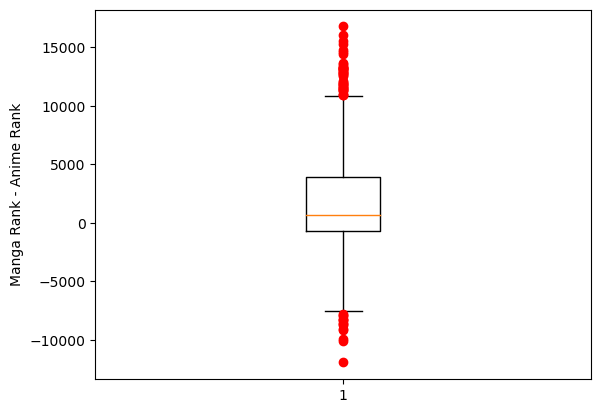

In [82]:
data = [manga_ranked["Comp Ranks"]]

fig,ax=plt.subplots()

ax.boxplot(data,0,'r')

ax.set_ylabel("Manga Rank - Anime Rank")

plt.show()

In [83]:
manga_ranked["Comp Score"]=""

for index, row in manga_ranked.iterrows():
    manga_ranked["Comp Score"] = manga_ranked["Manga Score"] - manga_ranked["Anime Score"]
    
    
manga_ranked.head()

,Title,Anime Rank,Adaptation Type,Episodes,Aired,Anime Votes,Anime Score,Manga Rank,Type,Volumes,Published,Manga Votes,Manga Score,Comp Ranks,Comp Score
212,Berserk,7404,TV,12,Jul 2016 - Sep 2016,345813,6.30,1,Manga,?,Aug 1989 -,637448,9.47,-7403,3.17
1038,One Piece,55,TV,?,Oct 1999 -,2182691,8.69,4,Manga,?,Jul 1997 -,573384,9.22,-51,0.53
626,Monster,25,TV,74,Apr 2004 - Sep 2005,1021020,8.87,5,Manga,18,Dec 1994 - Dec 2001,226020,9.15,-20,0.28
485,Slam Dunk,109,TV,101,Oct 1993 - Mar 1996,284596,8.54,6,Manga,31,Sep 1990 - Jun 1996,156001,9.08,-103,0.54
973,Vinland Saga,43,TV,24,Jul 2019 - Dec 2019,1371627,8.74,7,Manga,?,Apr 2005 -,279101,9.05,-36,0.31


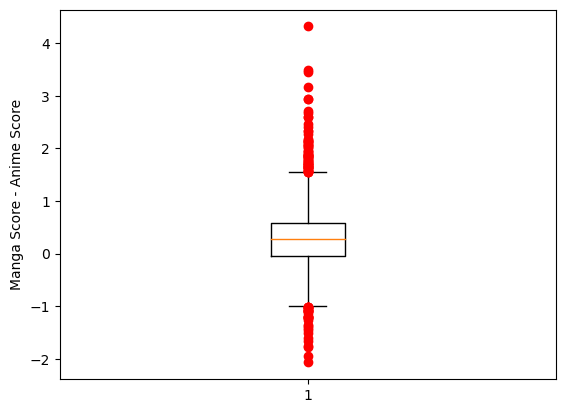

In [84]:
data = [manga_ranked["Comp Score"]]

fig,ax=plt.subplots()

ax.boxplot(data,0,'r')

ax.set_ylabel("Manga Score - Anime Score")

plt.show()

In [85]:
movies = manga_ranked.loc[manga_ranked["Adaptation Type"]=="Movie"]
ona = manga_ranked.loc[manga_ranked["Adaptation Type"]=="ONA"]
ova = manga_ranked.loc[manga_ranked["Adaptation Type"]=="OVA"]
special = manga_ranked.loc[manga_ranked["Adaptation Type"]=="Special"]
tv = manga_ranked.loc[manga_ranked["Adaptation Type"]=="TV"]

labels=["Movies","ONA","OVA","Specials","TV Shows"]

C:\Users\CassandraTamora\AppData\Local\Temp\ipykernel_8768\787097428.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


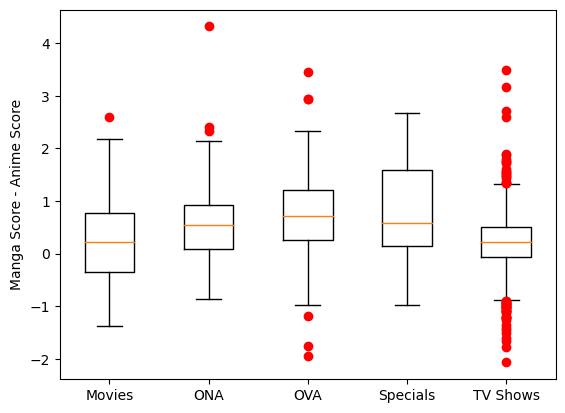

In [86]:
data = [movies["Comp Score"], ona["Comp Score"], ova["Comp Score"], special["Comp Score"], tv["Comp Score"]]

fig,ax=plt.subplots()

ax.set_ylabel("Manga Score - Anime Score")
ax.set_xticklabels(labels)
ax.boxplot(data,0,'r')
plt.show()

C:\Users\CassandraTamora\AppData\Local\Temp\ipykernel_8768\2296604615.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


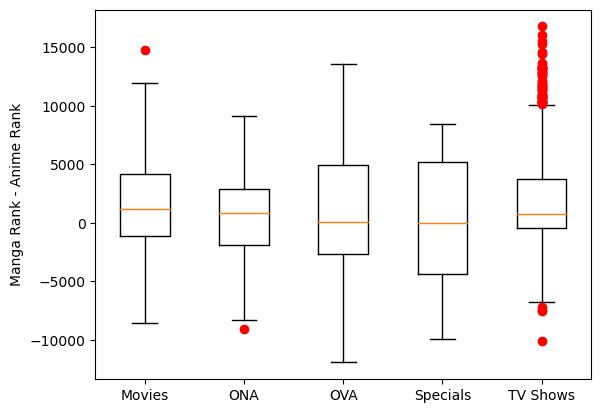

In [87]:
data = [movies["Comp Ranks"], ona["Comp Ranks"], ova["Comp Ranks"], special["Comp Ranks"], tv["Comp Ranks"]]

fig,ax=plt.subplots()

ax.set_ylabel("Manga Rank - Anime Rank")
ax.set_xticklabels(labels)
ax.boxplot(data,0,'r')

plt.savefig("comp_rank_box.png")

plt.show()

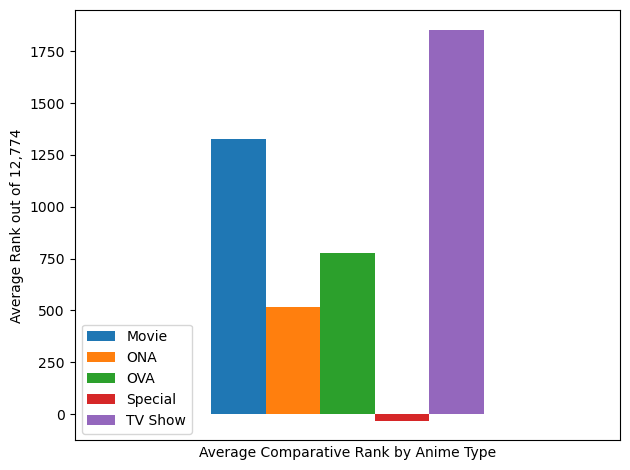

In [88]:
mov_rank_avg = movies["Comp Ranks"].mean()
ona_rank_avg = ona["Comp Ranks"].mean()
ova_rank_avg = ova["Comp Ranks"].mean() 
spe_rank_avg = special["Comp Ranks"].mean() 
tv_comp_ranks = tv["Comp Ranks"].mean()

avg_ranks = pd.DataFrame({"Movie":[mov_rank_avg], "ONA":[ona_rank_avg], 
                          "OVA":[ova_rank_avg], "Special":[spe_rank_avg], 
                          "TV Show":[tv_comp_ranks]})
#avg_ranks
avg_ranks.plot(kind="bar")

plt.xlabel("Average Comparative Rank by Anime Type")
plt.ylabel("Average Rank out of 12,774")
plt.tick_params(axis='x',bottom=False,labelbottom=False )
plt.legend(loc = "lower left")

plt.savefig("avg_comp_rank_bar.png")
plt.tight_layout()
plt.show()

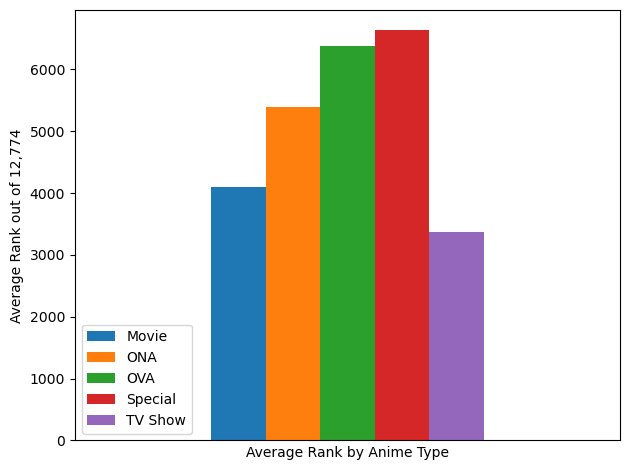

In [89]:
mov_ranks_avg = movies["Anime Rank"].mean()
ona_ranks_avg = ona["Anime Rank"].mean()
ova_ranks_avg = ova["Anime Rank"].mean() 
spe_ranks_avg = special["Anime Rank"].mean() 
tv_ranks_avg = tv["Anime Rank"].mean()

avg_rank = pd.DataFrame({"Movie":[mov_ranks_avg], "ONA":[ona_ranks_avg], 
                          "OVA":[ova_ranks_avg], "Special":[spe_ranks_avg], 
                          "TV Show":[tv_ranks_avg]})
avg_rank.plot(kind="bar")

plt.xlabel("Average Rank by Anime Type")
plt.ylabel("Average Rank out of 12,774")
plt.tick_params(axis='x',bottom=False,labelbottom=False )
plt.legend(loc = "lower left")

plt.savefig("avg_rank_bar.png")
plt.tight_layout()
plt.show()

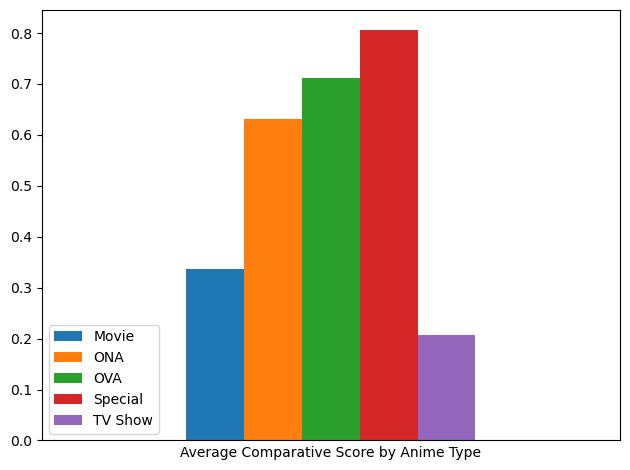

In [90]:
mov_score_avg = movies["Comp Score"].mean()
ona_score_avg = ona["Comp Score"].mean()
ova_score_avg = ova["Comp Score"].mean() 
spe_score_avg = special["Comp Score"].mean() 
tv_score_avg = tv["Comp Score"].mean()

avg_score = pd.DataFrame({"Movie":[mov_score_avg], "ONA":[ona_score_avg], 
                          "OVA":[ova_score_avg], "Special":[spe_score_avg], 
                          "TV Show":[tv_score_avg]})
avg_score.plot(kind="bar")

plt.xlabel("Average Comparative Score by Anime Type")
plt.tick_params(axis='x',bottom=False,labelbottom=False )
plt.legend(loc = "lower left")

plt.tight_layout()
plt.show()

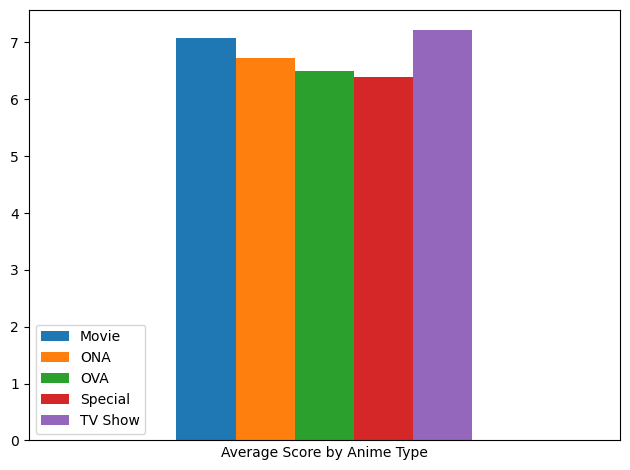

In [91]:
mov_scores_avg = movies["Anime Score"].mean()
ona_scores_avg = ona["Anime Score"].mean()
ova_scores_avg = ova["Anime Score"].mean() 
spe_scores_avg = special["Anime Score"].mean() 
tv_scores_avg = tv["Anime Score"].mean()

avg_scores = pd.DataFrame({"Movie":[mov_scores_avg], "ONA":[ona_scores_avg], 
                          "OVA":[ova_scores_avg], "Special":[spe_scores_avg], 
                          "TV Show":[tv_scores_avg]})
avg_scores.plot(kind="bar")

plt.xlabel("Average Score by Anime Type")
plt.tick_params(axis='x',bottom=False,labelbottom=False )
plt.legend(loc = "lower left")

plt.tight_layout()
plt.show()